# **Project Overview**

## **Objective**

Je moet unsupervised learning gebruiken om de muziekgenres van onbekende audioclips af te leiden. Er zijn 105 ongelabelde audiofragmenten waarvan de genres bekend zijn bij de docenten, maar verborgen voor jou. Je moet bepalen hoeveel genres er aanwezig zijn en welke genres dat zijn, en vervolgens elk ongelabeld audiobestand koppelen aan een genrelabel en de voorspellingen indienen bij Kaggle.

## **Wat voor data werken we mee?** 

we werkt met audiobestanden en CSV‑metadata:

* labeled/: audiobestanden met bekende genres (referentie voor training).
* Labels_new.csv: CSV‑bestand dat gelabelde audiobestandsnamen koppelt aan hun genres.
* unlabeled/: audiobestanden met onbekende genres (het hoofddoel voor clustering).
* sample_submission.csv: voorbeeld‑Kaggle‑inzendbestand met het vereiste outputformaat (filename, genre).
* Genres moeten exact overeenkomen met deze lijst: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'].

## **Vereiste deliverable**

Eén enkel, goed gestructureerd Jupyter‑notebook op GitHub dat:

* Markdown gebruikt voor tekst en codecellen voor code, met genummerde secties.
* Functies/OOP gebruikt en PEP8‑conforme code hanteert.
* Duidelijke uitleg bevat over feature engineering, clusteringkeuzes, dimensionality reduction en conclusies.
* Correcte bronverwijzingen bevat voor alle bronnen (inclusief GenAI indien gebruikt), met een APA‑referentielijst.

## 1. Step‑by‑Step Plan

1. Project setup en notebookstructuur
   Maak het vereiste Jupyter‑notebook en de repositorystructuur aan.

   1. Zorg ervoor dat er één duidelijk, goed gestructureerd notebook op GitHub staat.
   2. Gebruik Markdown‑cellen voor uitleg en codecellen voor code, en nummer hoofdstukken/secties.
   3. Gebruik zelfgedefinieerde functies, bij voorkeur OOP waar passend, en houd PEP8‑compliance aan.
   4. Zorg ervoor dat elk teamlid de code en tekst kan uitleggen.
   5. Bronnen correct citeren in tekst en code (APA‑stijl).

      \

## **2. Data‑inzicht en inladen**

1. **Bekijk de datasets en hun rol.**

   1. labeled/: gelabelde audio‑referentieset.
   2. Labels_new.csv: koppeling van gelabelde bestandsnamen aan genres.
   3. unlabeled/: audiobestanden die geclusterd moeten worden.
   4. sample_submission.csv: vereist outputformaat en vaste genrelijst.
2. **Data inladen en inspecteren**

   1. Gelabelde audio en labels inladen in een dataframe.

   2. Lijst met ongelabelde audiobestanden inladen in een dataframe.

   3. Controleren dat genrelables beperkt zijn tot de opgegeven lijst.

## **3. Feature engineering (Opdracht 1)**

1. **Ontwerp een featureset voor elk audiobestand.**

   1. Maak een dataframe met audiofeatures per bestand.
   2. Neem minimaal 8 features op (bijv. spectral bandwidth, spectral centroid, enz.).
2. **Implementeer feature‑extractie.**

   1. Schrijf herbruikbare functies/OOP om elke feature uit audio te berekenen.
   2. Zorg ervoor dat features worden berekend voor zowel de gelabelde als ongelabelde sets.
3. **Leg elke feature uit.**

   1. Beschrijf voor elke feature wat deze betekent en hoe deze wordt berekend, in je eigen woorden.

## **4. Unsupervised learning en clustering (Opdracht 2)**

1. **Schat het aantal clusters in de ongelabelde set.**

   1. Gebruik methoden zoals elbow/silhouette en leg de redenering uit.
   2. Onderbouw duidelijk het gekozen aantal clusters.
2. **Vergelijk minimaal 3 clusteringalgoritmen.**

   1. Doe onderzoek en leg uit hoe elk algoritme werkt (inclusief wiskunde indien nodig).
   2. Selecteer het beste algoritme en motiveer de keuze.
3. **Voer clustering uit en wijs cluster‑ID’s toe.**

   1. Pas het gekozen algoritme toe op de ongelabelde dataset.
   2. Wijs een clusternummer toe aan elk audiobestand.
4. **Leg de werking van het algoritme uit met een toy‑voorbeeld.**

   1. Geef een kleine, fictieve dataset en toon de berekeningen.
   2. Leg de wiskunde achter het gekozen algoritme uit.
5. **Koppel clusters aan genres.**

   1. Vergelijk clusterfeatures met de gelabelde data.
   2. Gebruik visualisaties om de koppeling te ondersteunen.
   3. Bepaal welk genre bij elk cluster hoort.
6. **Bereid de Kaggle‑inzending voor.**

   1. Vervang clusternummers door voorspelde genres.
   2. Maak een inzendbestand dat compatibel is met het voorbeeldformaat.

## **5. Analyse van dimensionality reduction**

1. **Pas PCA en NMF toe.**

   1. Voer zowel PCA als NMF uit op de featureset.
2. **Leg PCA en NMF uit**

   1. Geef een wiskundige uitleg en een vereenvoudigd numeriek voorbeeld.
   2. Vergelijk de verschillen en overeenkomsten tussen PCA en NMF.
3. **Bepaal het aantal dimensies.**

   1. Laat zien hoe je de dimensionaliteit voor elke methode hebt gekozen.
   2. Leg je selectiecriteria uit (bijv. verklaarde variantie).
4. **Voer clustering opnieuw uit met gereduceerde features.**

   1. Vervang de originele features door de gereduceerde en cluster opnieuw.
   2. Evalueer of de clustering is verbeterd of verslechterd.

## 6. Aanbevelingsapp

1. Bouw een eenvoudige aanbevelingsapp.

   1. Stel voor elk audiobestand vergelijkbare tracks voor (bijv. nearest neighbors).
   2. Houd het eenvoudig maar functioneel (bijv. een notebook‑widget, Streamlit, enz.).

## 7. Bevindingen en Conclusie (Opdracht 3)

1. Vat de belangrijkste bevindingen samen

   1. Identificeer welke features het belangrijkst waren voor clustering.
   2. Beschrijf het effect en het nut van dimensionality reduction.
   3. Bespreek welke extra data de aanbevelingen zou verbeteren.
2. Bronnen en naleving van citaties
   Pas APA‑citatiestijl toe voor alle bronnen.

## 8. Bronnen en naleving van citaties

1. **Pas APA‑citatiestijl toe voor alle bronnen.**

   1. Neem bronverwijzingen op voor tekst en code.
   2. Als GenAI is gebruikt, voeg de vereiste metadata en een ondersteunende traditionele bron toe.
   3. Voeg een definitieve referentielijst toe in APA‑stijl.


## Data inladen

In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import librosa
import librosa.display
import numpy as np


labels_df = pd.read_csv("labels_new.csv")
sample_submission = pd.read_csv("sample_submission.csv")

display(labels_df.head(),
        labels_df.shape,
        sample_submission.head(),
        sample_submission.shape)

DATA_DIR = "."

LABELED_DIR = os.path.join(DATA_DIR, "labeled")
UNLABELED_DIR = os.path.join(DATA_DIR, "unlabeled")

print("Aantal labeled files:", len(os.listdir(LABELED_DIR)))
print("Aantal unlabeled files:", len(os.listdir(UNLABELED_DIR)))

display(os.listdir(LABELED_DIR)[:5])

,filename,genre
0,m00248.wav,metal
1,m00230.wav,country
2,m00637.wav,hiphop
3,m00627.wav,metal
4,m00138.wav,reggae


(50, 2)

,filename,genre
0,metal.00032.wav,classical
1,pop.00023.wav,blues
2,classical.00076.wav,blues
3,classical.00021.wav,rock
4,metal.00052.wav,classical


(105, 2)

Aantal labeled files: 50
Aantal unlabeled files: 105


['m00002.wav', 'm00039.wav', 'm00041.wav', 'm00072.wav', 'm00096.wav']

labels_new.csv → 50 gelabelde audiofiles

sample_submission.csv → 105 te voorspellen audiofiles

Mappen labeled/ en unlabeled/ kloppen met die aantallen

Input : audio (.wav)

Target: genre (categorisch)

## Klassenverdeling

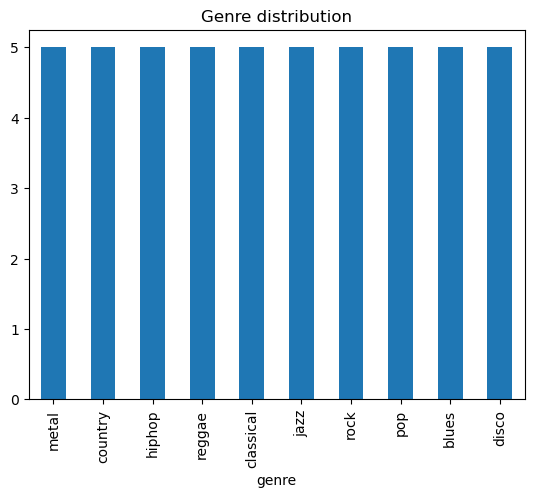

In [32]:
labels_df["genre"].value_counts()

labels_df["genre"].value_counts().plot(kind="bar", title="Genre distribution")
plt.show()

De dataset is volledig gebalanceerd met 5 samples per genre.

## Audio inspecteren (EDA voor audio)

### Duur van audiofragmenten

In [33]:
durations = []

for f in labels_df["filename"]:
    y, sr = librosa.load(f"labeled/{f}", sr=None)
    durations.append(len(y)/sr)

pd.Series(durations).describe()

count    50.000000
mean     30.017898
std       0.055558
min      30.000181
25%      30.012177
50%      30.013333
75%      30.013333
max      30.400907
dtype: float64

### Waveform + spectrogram

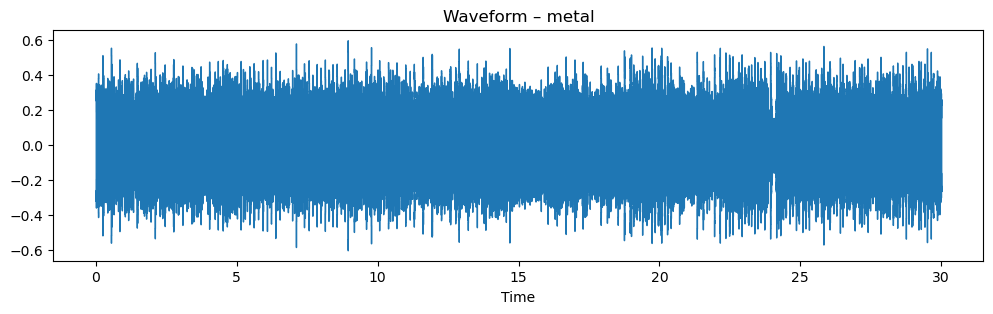

In [36]:
row = labels_df.sample(1).iloc[0]
y, sr = librosa.load(f"labeled/{row['filename']}", sr=None)

plt.figure(figsize=(12,3))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform – {row['genre']}")
plt.show()


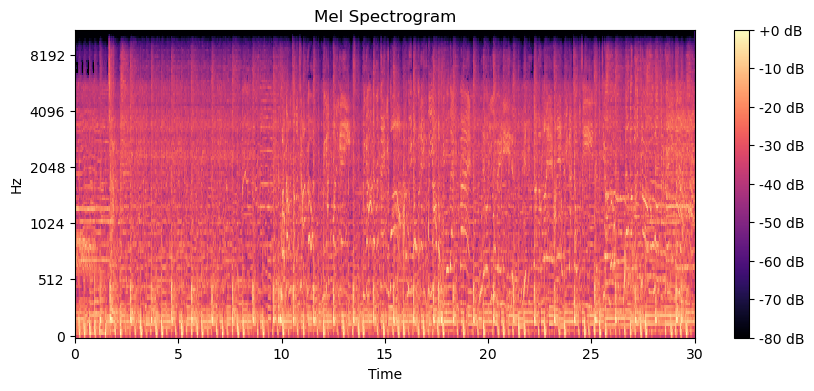

In [35]:
plt.figure(figsize=(10,4))
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()
